In [46]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np


# First I will do one of the bonus challenge questions using the techniques I already know (before I learned sqlalchemy).

In [47]:
# Bring in the csv file that was exported from pgAdmin 4 from postgreSQL
avg_salary_by_title = os.path.join('../sql-challenge/EmployeeSQL/average_salary_by_title.csv')

# Open and read the csv file and create a DataFrame
with open(avg_salary_by_title, newline="") as file_object:
    avg_salary_title = csv.reader(file_object)#, delimiter = ',')

    # Read the header row first
    avg_salary_title_header = next(avg_salary_title)

    # Create the DataFrame
    salary_by_title = pd.DataFrame(avg_salary_title, columns = ['title', 'average_salary'])

#Show the DataFrame
salary_by_title


,title,average_salary
0,Senior Staff,58503
1,Staff,58465
2,Manager,51531
3,Technique Leader,48581
4,Engineer,48540
5,Senior Engineer,48507
6,Assistant Engineer,48493


In [48]:
# Convert the "average salary" column from an object to numeric data
salary_by_title["average_salary"]=pd.to_numeric(salary_by_title["average_salary"])
salary_by_title

,title,average_salary
0,Senior Staff,58503
1,Staff,58465
2,Manager,51531
3,Technique Leader,48581
4,Engineer,48540
5,Senior Engineer,48507
6,Assistant Engineer,48493


In [49]:
# Check the "average salary" column to make sure it's numeric
try:
    print(type(salary_by_title["average_salary"][2]))
except:
    NameError
    print("except occurred")


<class 'numpy.int64'>


# This bar graph raises suspicions that this is a fake data set.
We would not expect assistant engineers, engineers, and senior engineers to all make the same average salary. It implies there is no pay increase with a promotion. The same is true of staff and senior staff, and it would be strange for staff to make more money than the manager and more money than the engineers. A "technique leader" is a position I have never heard of in a company.


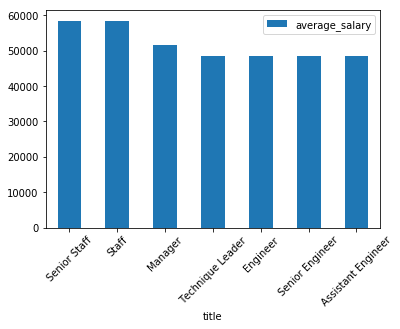

In [50]:
# Create a bar graph to show the average salary by title with data imported from postgreSQL
ax = salary_by_title.plot.bar(x='title', y='average_salary', rot=45)

# Check the number of salaries by 1000 dollar ranges


In [62]:
# Create the DataFrame from SQL queries + Excel for total sum per range
salary_data = [('40-50K', 158465), ('50-60K', 57915),('60-70K', 41413),('70-80K', 24814),('80-90K', 11845),('90-100K', 4284),('more than 100K', 1288)]
salary_range_df = pd.DataFrame(salary_data, columns = ['salary range', 'number of salaries in this range'])

#Show the DataFrame
salary_range_df


,salary range,number of salaries in this range
0,40-50K,158465
1,50-60K,57915
2,60-70K,41413
3,70-80K,24814
4,80-90K,11845
5,90-100K,4284
6,more than 100K,1288


# Number of salaries in 1000 dollar ranges

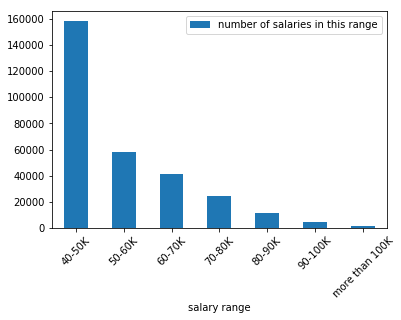

In [66]:
# Create a bar graph to show the average salary by title with data imported from postgreSQL
ax = salary_range_df.plot.bar(x='salary range', y='number of salaries in this range', rot=45)

In [ ]:
# Histogram - attempt a histogram command

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1232761d0>]],
      dtype=object)

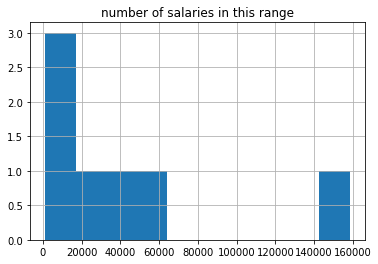

In [67]:
salary_range_df.hist(column='number of salaries in this range')